In [51]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

def nash_equilibrium(A):
    A = np.array(A, dtype=float)
    m, n = A.shape

    # сдвиг матрицы на минимальное значение вверх(чтобы потом были корректные действия)
    c_shift = max(0, -np.min(A)) + 1.0
    A_shifted = A + c_shift

    # решение ЗЛП для первого игрока
    c1 = np.ones(n) #создаем вектор 1
    Aub1 = -A_shifted.T
    bub1 = -np.ones(m)
    #-A_T * z <= -1
    res1 = linprog(c1, A_ub=Aub1, b_ub=bub1, method='simplex')

    if not res1.success:
        raise ValueError(f"Ошибка при решении ЗЛП для 1 Игрока")

    sum_z = res1.fun #сумма zi
    v_shifted = 1.0 / sum_z
    v = v_shifted - c_shift
    y_star = v_shifted * res1.x

    # Решение для второго игрока
    c2 = -np.ones(m)
    Aub2 = A_shifted
    bub2 = np.ones(n)

    res2 = linprog(c2, A_ub=Aub2, b_ub=bub2, method='simplex')

    if not res2.success:
        raise ValueError(f"Ошибка при решении ЗЛП для 2 Игрока")

    x_star = v_shifted * res2.x

    return v, y_star, x_star

In [52]:
def visualize_strategy_spectrum(strategies, titles):
    n_players = len(strategies)
    fig, axes = plt.subplots(1, n_players, figsize=(5 * n_players, 4))
    if n_players == 1:
        axes = [axes]

    for i, (strategy, title) in enumerate(zip(strategies, titles)):
        num_actions = len(strategy)
        actions = np.arange(1, num_actions + 1)

        axes[i].bar(actions, strategy)

        axes[i].set_xlabel('Чистая стратегия')
        axes[i].set_ylabel('Вероятность')
        axes[i].set_title(f'Оптимальная стратегия {title}')
        axes[i].set_xticks(actions)
        axes[i].set_yticks(np.arange(0, 1.1, 0.1))
        axes[i].grid(axis='y', linestyle='--', alpha=0.4)

    plt.tight_layout()
    plt.show()

Входные данные:
 [[ 4  0  6  2  2  1]
 [ 3  8  4 10  4  4]
 [ 1  2  6  5  0  0]
 [ 6  6  4  4 10  3]
 [10  4  6  4  0  9]
 [10  7  0  7  9  8]]
Игра, в которой спектр оптимальной стратегии неполон


/tmp/ipython-input-3059981222.py:18: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res1 = linprog(c1, A_ub=Aub1, b_ub=bub1, method='simplex')
/tmp/ipython-input-3059981222.py:33: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res2 = linprog(c2, A_ub=Aub2, b_ub=bub2, method='simplex')


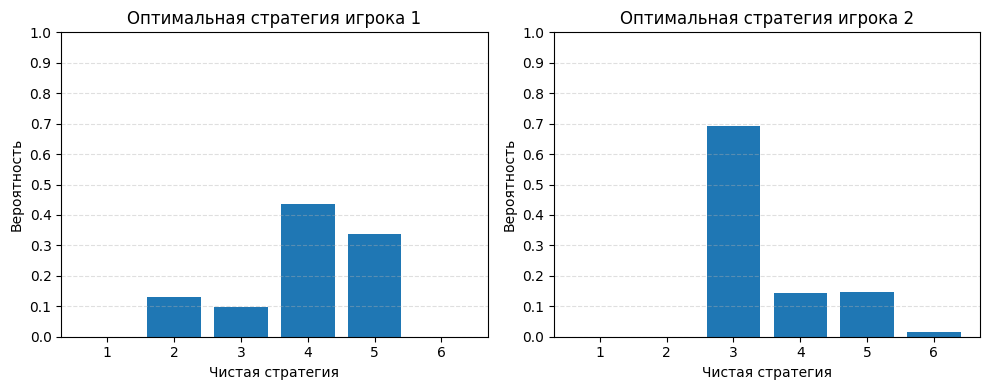

In [53]:
input_matrix = np.array([[4, 0, 6, 2, 2, 1], [3, 8, 4, 10, 4, 4], [1, 2, 6, 5, 0, 0], [6, 6, 4, 4, 10, 3], [10, 4, 6, 4, 0, 9], [10, 7, 0, 7, 9, 8]])
print("Входные данные:\n", input_matrix)
print("Игра, в которой спектр оптимальной стратегии неполон")
value, p, q = nash_equilibrium(input_matrix)
visualize_strategy_spectrum([p, q], ['игрока 1', 'игрока 2'])

Входные данные:
 [[5, 6], [2, 3]]
Игра, в которой спектр оптимальной стратегии состоит из одной точки


/tmp/ipython-input-3059981222.py:18: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res1 = linprog(c1, A_ub=Aub1, b_ub=bub1, method='simplex')
/tmp/ipython-input-3059981222.py:33: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res2 = linprog(c2, A_ub=Aub2, b_ub=bub2, method='simplex')


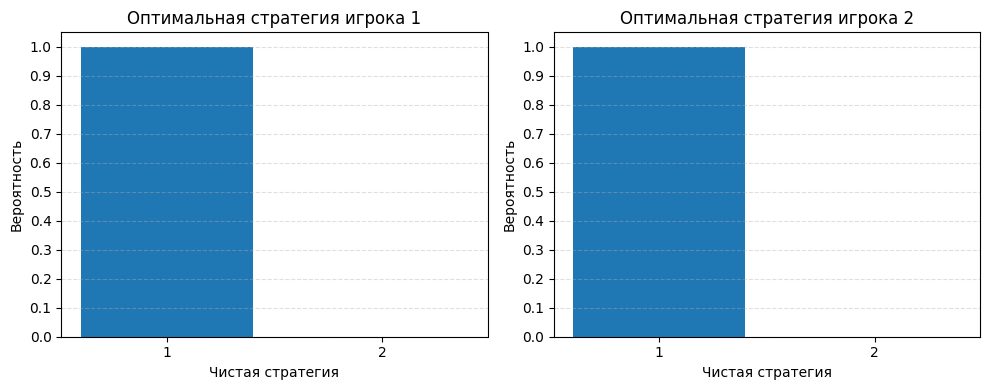

In [54]:
A = [[5, 6], [2, 3]]

print("Входные данные:\n", A)
print("Игра, в которой спектр оптимальной стратегии состоит из одной точки")
value, p, q = nash_equilibrium(A)
visualize_strategy_spectrum([p, q], ['игрока 1', 'игрока 2'])

Входные данные:
 [[4, 0, 2], [1, 3, 5], [-1, -2, -3]]
Игра, в которой спектр оптимальной стратегии неполон


/tmp/ipython-input-3059981222.py:18: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res1 = linprog(c1, A_ub=Aub1, b_ub=bub1, method='simplex')
/tmp/ipython-input-3059981222.py:33: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res2 = linprog(c2, A_ub=Aub2, b_ub=bub2, method='simplex')


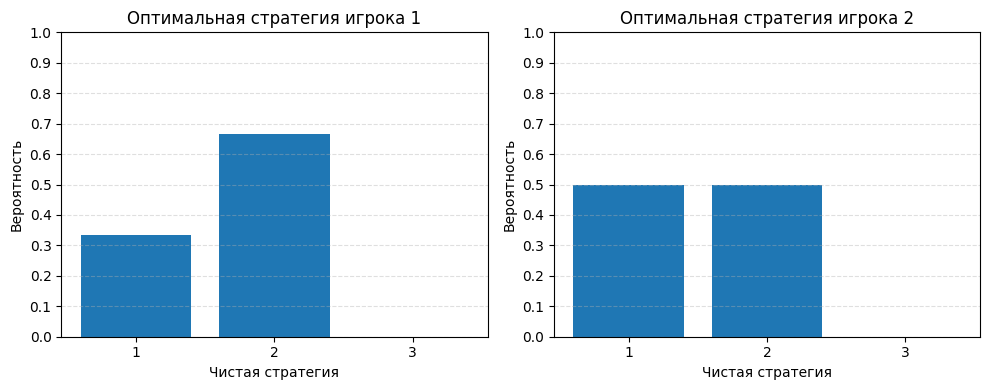

In [55]:
A = [[4, 0, 2], [1, 3, 5], [-1, -2, -3]]

print("Входные данные:\n", A)
print("Игра, в которой спектр оптимальной стратегии неполон")
value, p, q = nash_equilibrium(A)
visualize_strategy_spectrum([p, q], ['игрока 1', 'игрока 2'])

Входные данные:
 [[0, -1, 1], [1, 0, -1], [-1, 1, 0]]
Игра, в которой спектр оптимальной стратегии полон


/tmp/ipython-input-3059981222.py:18: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res1 = linprog(c1, A_ub=Aub1, b_ub=bub1, method='simplex')
/tmp/ipython-input-3059981222.py:33: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res2 = linprog(c2, A_ub=Aub2, b_ub=bub2, method='simplex')


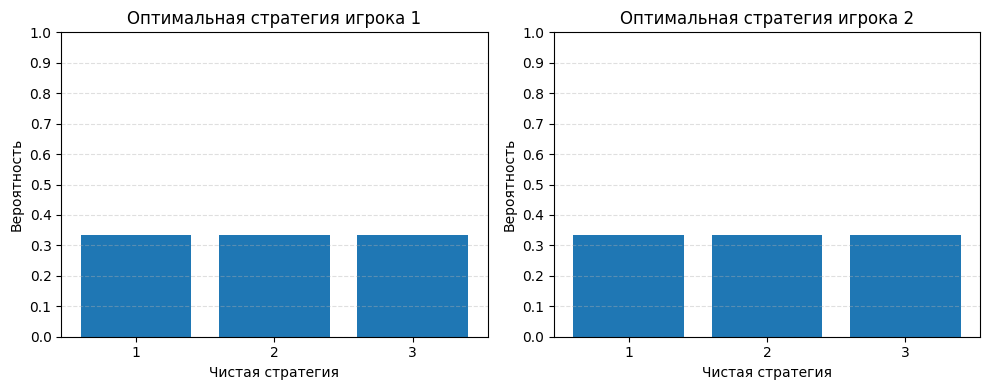

In [56]:
A = [[0, -1,  1], [1,  0, -1], [-1,  1,  0]]

print("Входные данные:\n", A)
print("Игра, в которой спектр оптимальной стратегии полон")
value, p, q = nash_equilibrium(A)
visualize_strategy_spectrum([p, q], ['игрока 1', 'игрока 2'])